# PyStata Example

- Author: Wenzhi Ding
- Date: 2022-07-06

This notebook is an example for using PyStata in Jupyter.

In [10]:
import pandas as pd
import seaborn as sns
import stata_setup

stata_setup.config('/usr/local/stata17', 'mp')

In [2]:
df = sns.load_dataset('tips')
df.shape
df.sample(3)

(244, 7)

,total_bill,tip,sex,smoker,day,time,size
230,24.01,2.0,Male,Yes,Sat,Dinner,4
29,19.65,3.0,Female,No,Sat,Dinner,2
102,44.30,2.5,Female,Yes,Sat,Dinner,3


## Install Packages

In [3]:
%%stata
ssc install reghdfe
ssc install ftools


. ssc install reghdfe
checking reghdfe consistency and verifying not already installed...
all files already exist and are up to date.

. ssc install ftools
checking ftools consistency and verifying not already installed...
all files already exist and are up to date.

. 


## Browse Manual

In [4]:
%%stata
help winsor2


-------------------------------------------------------------------------------
help for winsor2                                                         (blog)
-------------------------------------------------------------------------------

Winsorizing or Trimming variables
---------------------------------


Syntax
------

    winsor2 varlist [if] [in], [ suffix(string) replace trim cuts(# #)
                   by(groupvar) label ]


Description
-----------

    winsor2 winsorize or trim (if trim option is specified) the variables in 
    varlist at particular percentiles specified by option cuts(#1 #2).  In
    defult, new variables will be generated with a suffix "_w" or "_tr",
    which can be changed by specifying suffix() option.  The replace option
    replaces the variables with their winsorized or trimmed ones.

        +---------------------------------------------+
    ----+ Difference between winsorizing and trimming +----------------------

    Winsorizing is not equivale

## Define Macros

For example, I define the explanatory variables I will use later.

In [5]:
%%stata
global X "total_bill size"

## Run Regression

All parameters are optional:
- Data input: `df`
- Force update data
    - Otherwise Stata will use the latest data in memory
    - If you pretty sure you do not change the data, it will be faster to use the data in memory instead of forcing update.
- Estimation result output: `eret`
- Data output: `df2`

For more details, please refer to `%%stata?`

In [6]:
%%stata -d df -force -eret eret -doutd df2
reghdfe tip $X, a(sex time day smoker) vce(cluster time)
est store m1


. reghdfe tip $X, a(sex time day smoker) vce(cluster time)
(MWFE estimator converged in 5 iterations)
> clusters

HDFE Linear regression                            Number of obs   =        244
Absorbing 4 HDFE groups                           F(   2,      1) =          .
Statistics robust to heteroskedasticity           Prob > F        =          .
                                                  R-squared       =     0.4701
                                                  Adj R-squared   =     0.4497
                                                  Within R-sq.    =     0.4551
Number of clusters (time)    =          2         Root MSE        =     1.0264

                                   (Std. err. adjusted for 2 clusters in time)
------------------------------------------------------------------------------
             |               Robust
         tip | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
-------------+--------------------------------------------

Let's see what has been returned to Python:

1. The data generated by Stata -> Convenient for further processing
2. The estimation results -> Process model parameters easily

In [7]:
df2.sample(3)

,total_bill,tip,sex,smoker,day,time,size,_est_m1
98,21.01,3.00,Male,Yes,Fri,Dinner,2,1
193,15.48,2.02,Male,Yes,Thur,Lunch,2,1
108,18.24,3.76,Male,No,Sat,Dinner,2,1


In [8]:
eret

{'e(F)': 8.98846567431158e+307,
 'e(rmse)': 1.026416613194794,
 'e(mss)': 218.68620811008896,
 'e(rss)': 246.52626893909155,
 'e(tss_within)': 452.42062716865007,
 'e(tss)': 465.2124770491805,
 'e(df_m)': 2.0,
 'e(N_full)': 244.0,
 'e(num_singletons)': 0.0,
 'e(drop_singletons)': 1.0,
 'e(ic)': 5.0,
 'e(df_a_nested)': 2.0,
 'e(df_a_redundant)': 4.0,
 'e(df_a_initial)': 10.0,
 'e(df_a)': 6.0,
 'e(N_hdfe_extended)': 4.0,
 'e(N_hdfe)': 4.0,
 'e(df_r)': 1.0,
 'e(rank)': 2.0,
 'e(N)': 244.0,
 'e(N_clustervars)': 1.0,
 'e(report_constant)': 1.0,
 'e(sumweights)': 244.0,
 'e(N_clust1)': 2.0,
 'e(N_clust)': 2.0,
 'e(r2_a_within)': 0.45043767649857314,
 'e(r2_a)': 0.4496965125752467,
 'e(r2_within)': 0.4550949843248564,
 'e(r2)': 0.47007812322060805,
 'e(ll_0)': -421.5491838743587,
 'e(ll)': -347.4776423882719,
 'e(_estimates_name)': 'm1',
 'e(vce)': 'cluster',
 'e(vcetype)': 'Robust',
 'e(clustvar1)': 'time',
 'e(clustvar)': 'time',
 'e(indepvars)': 'total_bill size _cons',
 'e(depvar)': 'tip'

## Draw Plot

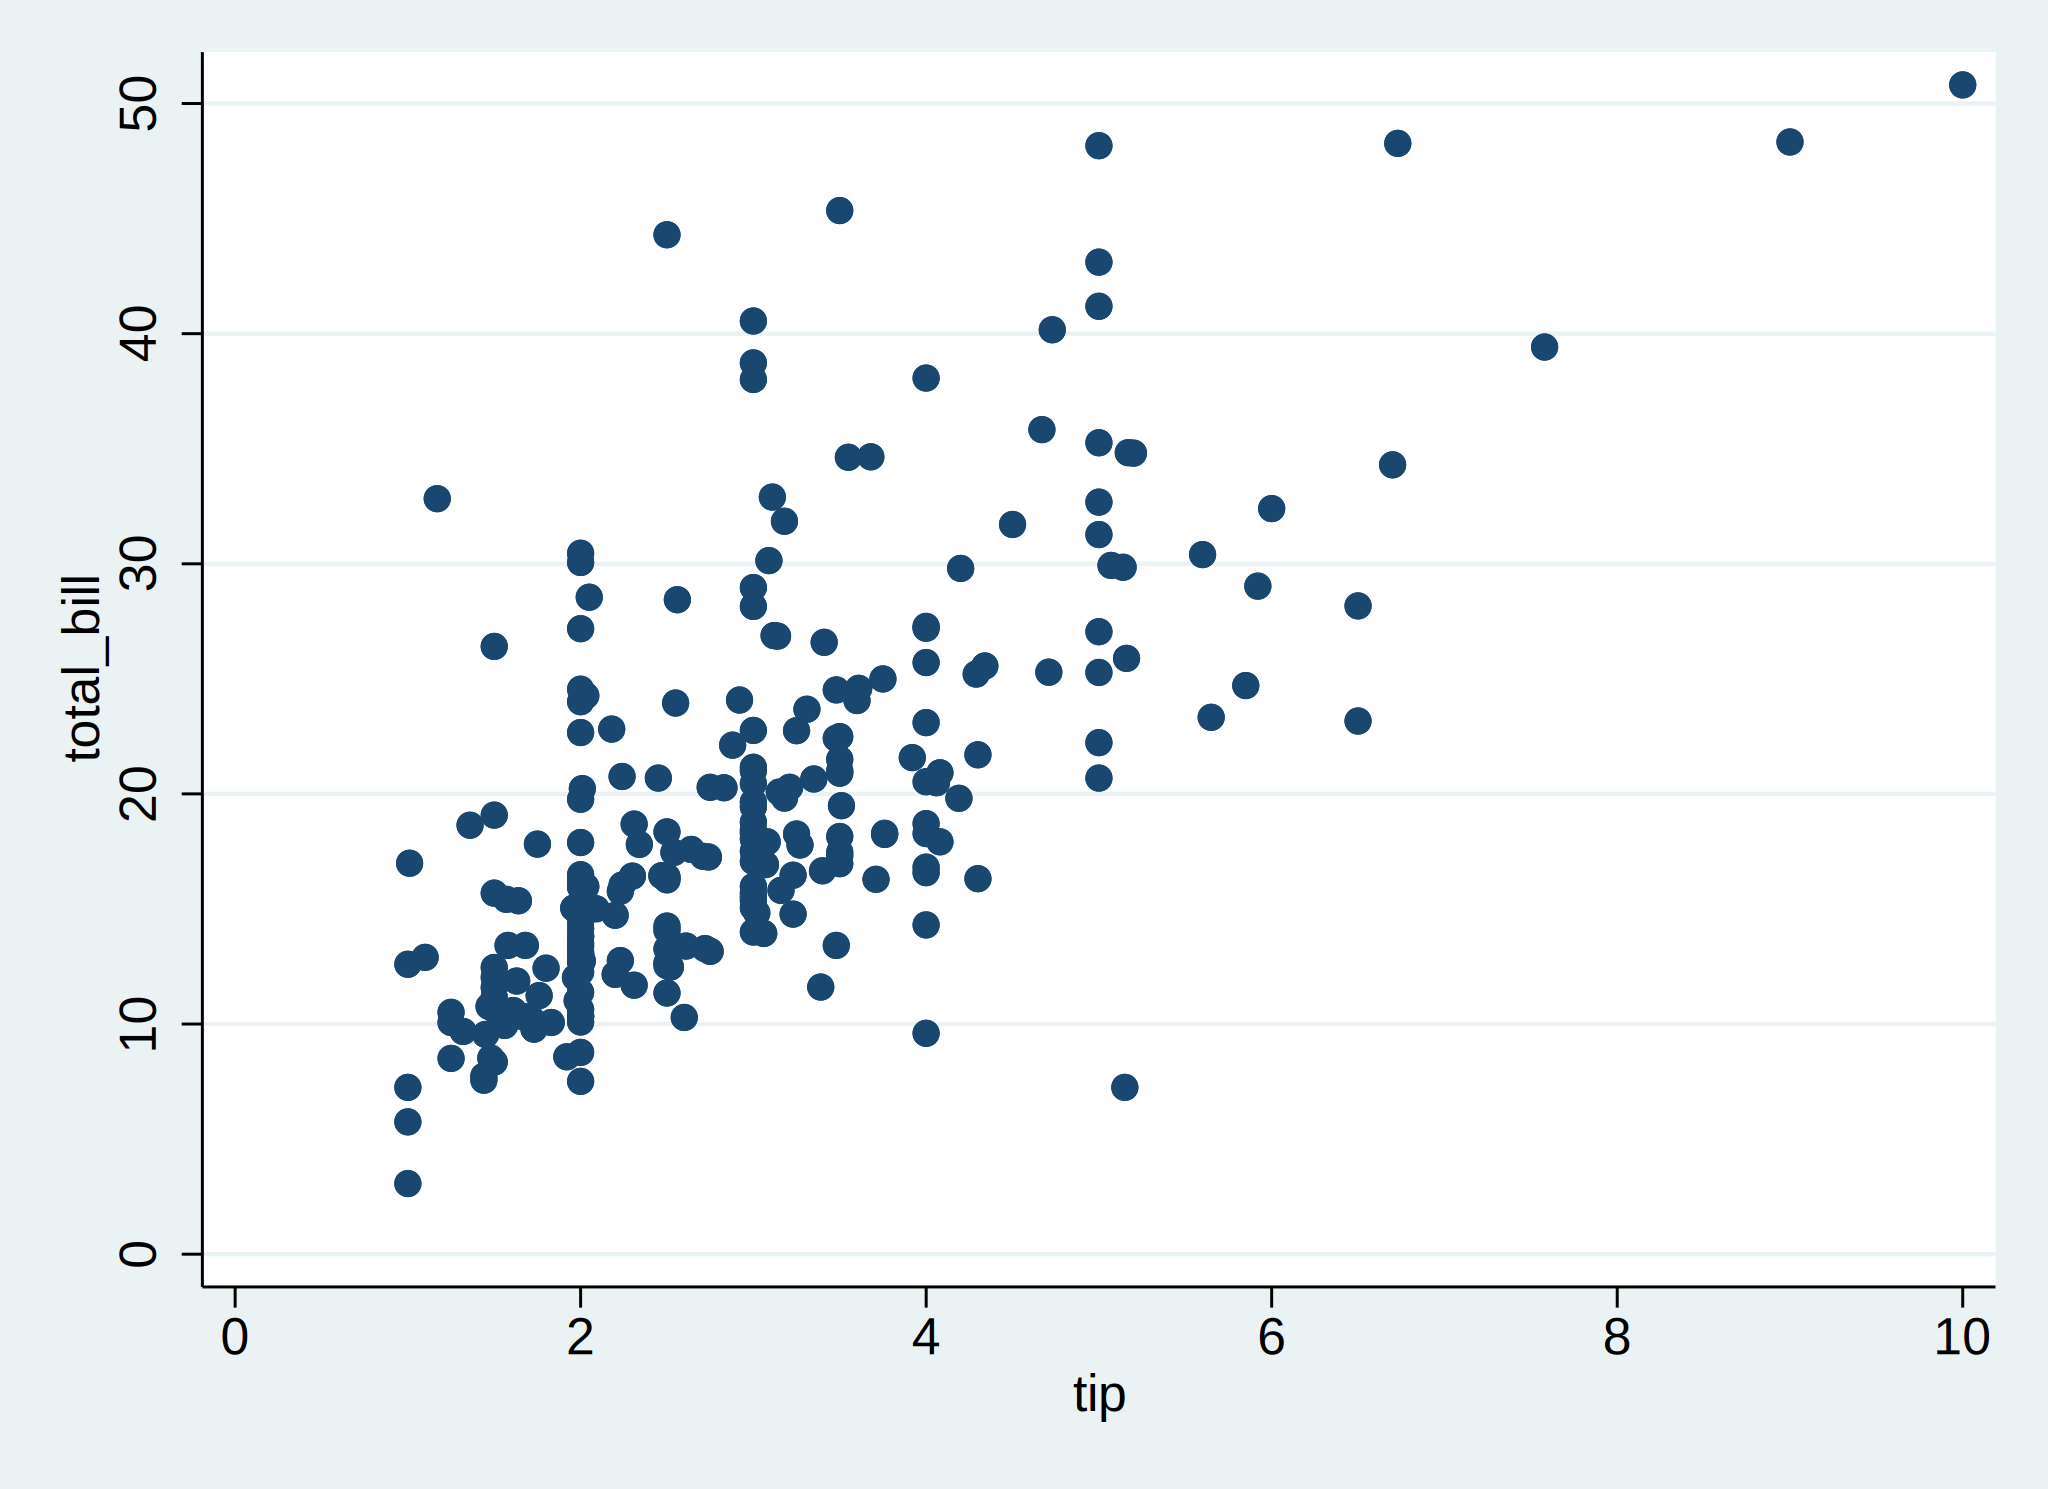

In [9]:
%%stata
twoway (scatter total_bill tip)